In [2]:
import pandas as pd
import yfinance as yf
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

In [4]:
# Pull unemployment data
unemployment_rate = fred.get_series('UNRATE', observation_start='2018-01-01')
unemployment_rate = unemployment_rate.dropna()
unemployment_rate.head()

2018-01-01    4.0
2018-02-01    4.1
2018-03-01    4.0
2018-04-01    4.0
2018-05-01    3.8
dtype: float64

<AxesSubplot:title={'center':'US Unemployment Rate'}, xlabel='Date', ylabel='unemployment (%)'>

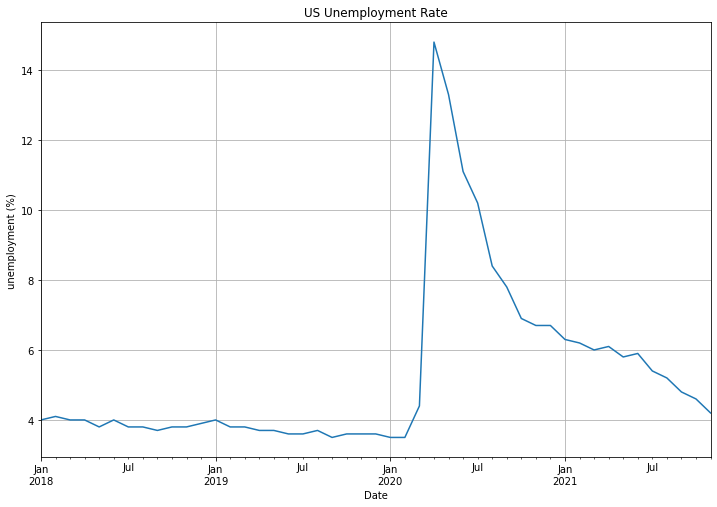

In [5]:
# Plot unemployment data
unemployment_rate.plot(figsize=(12,8), title='US Unemployment Rate', grid=True, xlabel='Date', ylabel='unemployment (%)')

In [6]:
# Pull S&P 500 historical data; set freq to monthly
ticker = "^GSPC" 
start= "2018-01-01" 
end= "2021-12-17"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='M').ffill().dropna()
sp_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-31,2832.409912,2839.260010,2813.040039,2823.810059,2823.810059,4.261280e+09
2018-02-28,2753.780029,2761.520020,2713.540039,2713.830078,2713.830078,4.230660e+09
2018-03-31,2753.780029,2761.520020,2713.540039,2713.830078,2713.830078,4.230660e+09
2018-04-30,2682.510010,2682.870117,2648.040039,2648.050049,2648.050049,3.734530e+09
2018-05-31,2720.979980,2722.500000,2700.679932,2705.270020,2705.270020,4.235370e+09


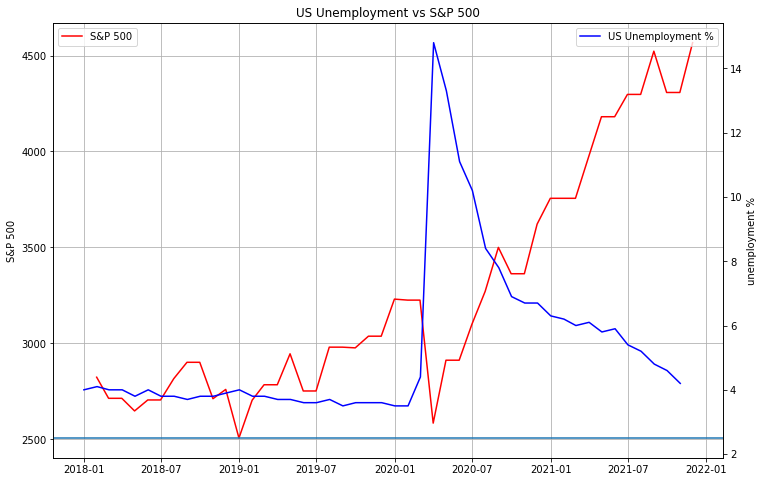

In [7]:
#Plot US unemployment against S&P 500 index
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(unemployment_rate, label='US Unemployment %', color='b')
ax.set_title('US Unemployment vs S&P 500')
ax2.set_ylabel('unemployment %')
ax2.axhline(y=2.5)
ax2.legend(loc='upper right')